# Experiment: Contact Surfaces for CCM

Hack to create double contact patches enclosing overlapping volume of two simple bodies (Ball and Box) by reusing code in hydroelastic contact.

Each body has two superimposed collision geometries: rigid-hydroelastic and compliant-hydroelastic. Totally there are four collision geometries:

1. rigid-hydroelastic ball (RBall)
2. compliant-hydroelastic ball (CBall)
3. rigid-hydroelastic box (RBox)
4. compliant-hydroelastic box (CBox)

One patch is the hydroelastic contact patch of RBall+CBox.
Another patch is CBall+RBox.
We use collision filter to avoid RBall+RBox point contact and CBall+CBox hydroelastic contact.

For visual geometries, each body has one:

1. visual ball (VBall)
2. visual box (VBox)

In [1]:
from pydrake.geometry import StartMeshcat

# Start the visualizer. The cell will output an HTTP link after the execution.
# Click the link and a MeshCat tab should appear in your browser.
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7000


## Ball

### Mass property and inertia matrix

Mass 1 kg, radius 10 cm.
See documentation of
[SpatialInertia.](https://drake.mit.edu/doxygen_cxx/classdrake_1_1multibody_1_1_spatial_inertia.html)

In [2]:
from pydrake.multibody.tree import SpatialInertia
spatial_inertia = SpatialInertia.SolidSphereWithMass(
          mass=1, radius=0.1)
mass = spatial_inertia.get_mass()
center_of_mass = spatial_inertia.get_com()
matrix6 = spatial_inertia.CopyToFullMatrix6()

print(f"mass = {mass}\n")
print(f"p_PScm = center of mass = {center_of_mass}\n")
print(f"I_SP = rotational inertia = \n{matrix6[:3, :3]}\n")

mass = 1.0

p_PScm = center of mass = [0. 0. 0.]

I_SP = rotational inertia = 
[[0.004 0.    0.   ]
 [0.    0.004 0.   ]
 [0.    0.    0.004]]



### One visual geometry with two collision geometries

In [3]:
from pydrake.visualization import ModelVisualizer

def Ball():
    return f"""<?xml version="1.0"?>
    <sdf version="1.7">
      <model name="Ball">
        <pose>0 0 0 0 0 0</pose>
        <link name="Ball">
          <inertial>
            <mass>1.0</mass>
            <inertia>
              <ixx>0.004</ixx> <ixy>0.0</ixy> <ixz>0.0</ixz>
              <iyy>0.004</iyy> <iyz>0.0</iyz>
              <izz>0.004</izz>
            </inertia>
          </inertial>
          <visual name="VBall">
            <geometry>
              <sphere>
                <radius>0.10</radius>
              </sphere>
            </geometry>
            <material>
              <diffuse>0.5 1.0 0.5 0.3</diffuse>
            </material>
          </visual>
          <collision name="RBall">
            <pose>0.1 0 0 0 0 0 </pose>  
            <geometry>
              <sphere>
                <radius>0.10</radius>
              </sphere>
            </geometry>
            <drake:proximity_properties>
              <drake:rigid_hydroelastic/>
              <drake:mesh_resolution_hint>0.025</drake:mesh_resolution_hint>
              <drake:mu_dynamic>0.5</drake:mu_dynamic>
              <drake:hunt_crossley_dissipation>1.25</drake:hunt_crossley_dissipation>
            </drake:proximity_properties>
          </collision>
          <collision name="CBall">
            <pose>-0.1 0 0 0 0 0 </pose>          
            <geometry>
              <sphere>
                <radius>0.10</radius>
              </sphere>
            </geometry>
            <drake:proximity_properties>
              <drake:compliant_hydroelastic/>
              <drake:hydroelastic_modulus> 1e7 </drake:hydroelastic_modulus>
              <drake:mesh_resolution_hint>0.025</drake:mesh_resolution_hint>
              <drake:mu_dynamic>0.5</drake:mu_dynamic>
              <drake:hunt_crossley_dissipation>1.25</drake:hunt_crossley_dissipation>
            </drake:proximity_properties>
          </collision>          
        </link>
      </model>
    </sdf>
    """

ball_sdf = Ball()

# Visualize the SDFormat string you just defined.
visualizer = ModelVisualizer(meshcat=meshcat, visualize_frames=True)
visualizer.parser().AddModelsFromString(ball_sdf, "sdf")
visualizer.Run(loop_once=True)

<RunResult.STOPPED: 2>

## Box

### Mass property and inertia matrix

Mass 1 kg, size 20x20x20 cm.
See documentation of
[SpatialInertia.](https://drake.mit.edu/doxygen_cxx/classdrake_1_1multibody_1_1_spatial_inertia.html)

In [4]:
from pydrake.multibody.tree import SpatialInertia
spatial_inertia = SpatialInertia.SolidBoxWithMass(
          mass=1, lx=0.2, ly=0.2, lz=0.2)
mass = spatial_inertia.get_mass()
center_of_mass = spatial_inertia.get_com()
matrix6 = spatial_inertia.CopyToFullMatrix6()

print(f"mass = {mass}\n")
print(f"p_PScm = center of mass = {center_of_mass}\n")
print(f"I_SP = rotational inertia = \n{matrix6[:3, :3]}\n")

mass = 1.0

p_PScm = center of mass = [0. 0. 0.]

I_SP = rotational inertia = 
[[0.00666667 0.         0.        ]
 [0.         0.00666667 0.        ]
 [0.         0.         0.00666667]]



### One visual geometry with two collision geometries

In [5]:
from pydrake.visualization import ModelVisualizer

def Box():
    return f"""<?xml version="1.0"?>
    <sdf version="1.7">
      <model name="Box">
        <pose>0 0 0 0 0 0</pose>
        <link name="Box">
          <inertial>
            <mass>1.0</mass>
            <inertia>
              <ixx>0.00666667</ixx> <ixy>0.0</ixy> <ixz>0.0</ixz>
              <iyy>0.00666667</iyy> <iyz>0.0</iyz>
              <izz>0.00666667</izz>
            </inertia>
          </inertial>
          <visual name="VBox">
            <geometry>
              <box>
                <size>0.20 0.20 0.20</size>
              </box>
            </geometry>
            <material>
              <diffuse>1.0 0.5 1.0 0.3</diffuse>
            </material>
          </visual>
          <collision name="RBox">
            <pose>-0.1 0 0 0 0 0 </pose>
            <geometry>
              <box>
                <size>0.20 0.20 0.20</size>
              </box>
            </geometry>
            <drake:proximity_properties>
              <drake:rigid_hydroelastic/>
              <drake:mu_dynamic>0.5</drake:mu_dynamic>
              <drake:hunt_crossley_dissipation>1.25</drake:hunt_crossley_dissipation>
            </drake:proximity_properties>
          </collision>
          <collision name="CBox">
            <pose>0.1 0 0 0 0 0 </pose>
            <geometry>
              <box>
                <size>0.20 0.20 0.20</size>
              </box>
            </geometry>
            <drake:proximity_properties>
              <drake:compliant_hydroelastic/>
              <drake:hydroelastic_modulus> 1e7 </drake:hydroelastic_modulus>
              <drake:mu_dynamic>0.5</drake:mu_dynamic>
              <drake:hunt_crossley_dissipation>1.25</drake:hunt_crossley_dissipation>
            </drake:proximity_properties>
          </collision>
        </link>
      </model>
    </sdf>
    """

box_sdf = Box()

# Visualize the SDFormat string you just defined.
visualizer = ModelVisualizer(meshcat=meshcat, visualize_frames=True)
visualizer.parser().AddModelsFromString(box_sdf, "sdf")
visualizer.Run(loop_once=True)

<RunResult.STOPPED: 2>

## Create Diagram of the scene

In [6]:
from pydrake.math import RigidTransform
from pydrake.multibody.parsing import Parser
from pydrake.multibody.plant import AddMultibodyPlant, MultibodyPlantConfig
from pydrake.systems.framework import DiagramBuilder

def add_scene(time_step=1e-3, solver="tamsi"):
    # Clear MeshCat window from the previous blocks.
    meshcat.Delete()
    meshcat.DeleteAddedControls()

    builder = DiagramBuilder()
    plant, scene_graph = AddMultibodyPlant(
        MultibodyPlantConfig(
            time_step=time_step,
            discrete_contact_solver=solver),
        builder)
    parser = Parser(plant)

    # Load the table top and the box we created.
    parser.AddModelsFromString(ball_sdf, "sdf")
    parser.AddModelsFromString(box_sdf, "sdf")

    # Finalize the plant after loading the scene.
    plant.Finalize()

    plant.SetDefaultFreeBodyPose(plant.GetBodyByName("Box"),  RigidTransform(p=[0, 0, 0]))
    plant.SetDefaultFreeBodyPose(plant.GetBodyByName("Ball"), RigidTransform(p=[0, 0, 0.15]))

    return builder, plant, scene_graph

## Set up visualization of the simulation

In [7]:
from pydrake.visualization import ApplyVisualizationConfig, VisualizationConfig

def add_viz(builder, plant):    
    ApplyVisualizationConfig(
        config=VisualizationConfig(
                   publish_period = 1 / 16.0,
                   publish_contacts = True),
        builder=builder, meshcat=meshcat)
    
    return builder, plant

## Report contact results numerically

In [8]:
from pydrake.systems.framework import LeafSystem
from pydrake.common.value import AbstractValue
from pydrake.multibody.plant import ContactResults

class ContactReporter(LeafSystem):
    def __init__(self, scene_graph):
        super().__init__()  # Don't forget to initialize the base class.
        self._scene_graph = scene_graph
        self.DeclareAbstractInputPort(
            name="contact_results",
            model_value=AbstractValue.Make(
                # Input port will take ContactResults from MultibodyPlant
                ContactResults()))
        # Calling `ForcedPublish()` will trigger the callback.
        self.DeclareForcedPublishEvent(self.Publish)
        
    def Publish(self, context):        
        model_inspector = self._scene_graph.model_inspector()               
        print()
        print(f"ContactReporter::Publish() called at time={context.get_time()}")
        contact_results = self.get_input_port().Eval(context)
        
        num_hydroelastic_contacts = contact_results.num_hydroelastic_contacts()
        print(f"num_hydroelastic_contacts() = {num_hydroelastic_contacts}")
        
        for c in range(num_hydroelastic_contacts):
            print("========================")
            print(f"hydroelastic_contact_info({c})")
            hydroelastic_contact_info = contact_results.hydroelastic_contact_info(c)
            
            print(f"F_Ac_W():")
            print(f"{hydroelastic_contact_info.F_Ac_W()}")
                        
            contact_surface = hydroelastic_contact_info.contact_surface()
            name_M = model_inspector.GetName(contact_surface.id_M())
            name_N = model_inspector.GetName(contact_surface.id_N())
            print(f"contact_surface(): {name_M}/{name_N}")
            num_faces = contact_surface.num_faces()
            total_area = contact_surface.total_area()
            centroid = contact_surface.centroid()
            print(f"total_area(): area of contact surface in m^2 = {total_area}")
            print(f"num_faces(): number of polygons or triangles = {num_faces}")
            print(f"centroid(): centroid (in World frame) = {centroid}")        
        
        print()

def add_contact_report(builder, plant, scene_graph):   
    contact_reporter = builder.AddSystem(ContactReporter(scene_graph))    
    builder.Connect(plant.get_contact_results_output_port(),
                    contact_reporter.get_input_port(0))
        
    return builder, plant

## Run simulation
The following code will run the simulation and show results similar to the following picture.
The red arrow represents the force `f`,
and the blue arrow represents the torque `tau`.
You should see the contact patch moving around together with the force and torque vectors.
At the end of simulation, it will also report contact result numerically.

Notice that the code below does not publish the recording yet.
The next section will publish the recording for playback.

In [9]:
from pydrake.systems.analysis import Simulator

def run_simulation_with_contact_report_and_viz(sim_time, time_step=1e-3, solver="tamsi"):
    builder, plant, scene_graph = add_scene(time_step, solver)
    add_viz(builder, plant)
    add_contact_report(builder, plant, scene_graph)
    
    diagram = builder.Build()
    
    simulator = Simulator(diagram)
    simulator.Initialize()
    simulator.set_target_realtime_rate(1.0)
    
    meshcat.StartRecording(frames_per_second=16.0)
    simulator.AdvanceTo(sim_time)
    meshcat.StopRecording()

    # Numerically report contact results at the end of simulation.
    diagram.ForcedPublish(simulator.get_context())

    
run_simulation_with_contact_report_and_viz(sim_time=0)


ContactReporter::Publish() called at time=0.0
num_hydroelastic_contacts() = 2
hydroelastic_contact_info(0)
F_Ac_W():
SpatialForce(
  tau=[0.001630623507385555, 0.21831853802100132, -0.0003178460082768767],
  f=[6.2888145756373905, 0.005756164928964136, 15.881786393580233],
)
contact_surface(): Ball::RBall/Box::CBox
total_area(): area of contact surface in m^2 = 0.02986992322552899
num_faces(): number of polygons or triangles = 165
centroid(): centroid (in World frame) = [ 9.99922675e-02 -1.96336707e-09  7.53585598e-02]
hydroelastic_contact_info(1)
F_Ac_W():
SpatialForce(
  tau=[-0.00010736648689674104, 0.44036227169327047, -2.49250195834402e-05],
  f=[-2.8149108271017624, -0.0003674706272407706, 5.635583959951471],
)
contact_surface(): Ball::CBall/Box::RBox
total_area(): area of contact surface in m^2 = 0.02264269497201349
num_faces(): number of polygons or triangles = 165
centroid(): centroid (in World frame) = [-9.99987243e-02 -9.90865375e-09  9.94734946e-02]



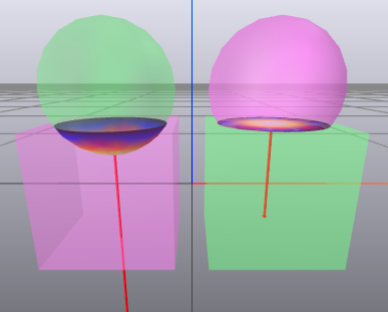

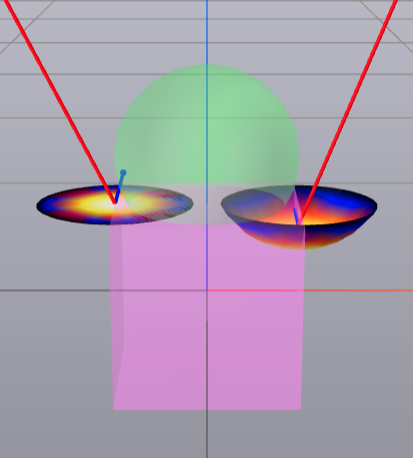

The End